In [242]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [243]:
nhpd = pd.read_excel('Active and Inconclusive Properties.xlsx')

In [244]:
nhpd.shape

(82287, 252)

In [245]:
# Let's find the percent of missing values in each column. 

def find_missing(df: pd.DataFrame):
    """
    Calculates the percent of missing values in a given dataset
    param df: The dataframe for which we want to calculate the percent of missing values in each column
    """
    
    missing = df.isnull().sum()
    
    percent_missing = missing * 100/ len(df)
    
    missing_df = pd.DataFrame({'col': df.columns, 'percent_missing': percent_missing})
    
    #sort them in decreasing order
    missing_df.sort_values(by = 'percent_missing', ascending= False, inplace=True)
    
    return missing_df
    
    

missing_values = find_missing(nhpd)


In [246]:
# number of columns with more than 90% missing data
df_subset_90 = missing_values[missing_values['percent_missing'] >= 90]
df_subset_90['col'].nunique()

137

In [247]:
# number of columns with less than 30% missing data
df_subset_30 = missing_values[missing_values['percent_missing'] <= 30]
df_subset_30['col'].nunique()

62

In [248]:
# number of columns with less than 100% missing data
df_subset_100 = missing_values[missing_values['percent_missing'] == 100]
df_subset_100['col'].nunique()

18

In [249]:
no_missing_list = df_subset_90['col'].unique().tolist()

In [250]:
# We will explore these columns first as they donot have any missing values
nhpd_subset = nhpd.loc[:, nhpd.columns.isin(no_missing_list)]
nhpd_subset

,S8_1_InacStatusDesc,S8_2_ID,S8_2_Status,S8_2_ProgramName,S8_2_RenewalStatus,S8_2_StartDate,S8_2_EndDate,S8_2_AssistedUnits,S8_2_RentToFMR,S8_2_InacStatusDesc,...,Pbv_1_AssistedUnits,Pbv_2_Status,Pbv_2_ProgramName,Pbv_2_AssistedUnits,Mr_1_Status,Mr_1_ProgramName,Mr_1_AssistedUnits,Mr_2_Status,Mr_2_ProgramName,Mr_2_AssistedUnits
0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NY06S011007,Active,PRAC/202,4: Request Renewal for Projects Exempt from OAHP,2021-02-01,2046-01-31,21.0,84.84,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82282,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82283,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82284,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82285,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [251]:
# Now that we have our dataset with columns having complete data, lets focus on each column and explore more

nhpd_subset.columns

Index(['S8_1_InacStatusDesc', 'S8_2_ID', 'S8_2_Status', 'S8_2_ProgramName',
       'S8_2_RenewalStatus', 'S8_2_StartDate', 'S8_2_EndDate',
       'S8_2_AssistedUnits', 'S8_2_RentToFMR', 'S8_2_InacStatusDesc',
       ...
       'Pbv_1_AssistedUnits', 'Pbv_2_Status', 'Pbv_2_ProgramName',
       'Pbv_2_AssistedUnits', 'Mr_1_Status', 'Mr_1_ProgramName',
       'Mr_1_AssistedUnits', 'Mr_2_Status', 'Mr_2_ProgramName',
       'Mr_2_AssistedUnits'],
      dtype='object', length=137)

In [252]:
def univariate_analysis(df:pd.DataFrame, col: str):
    """
    Takes a dataframe and a column name to plot the 
    param df: dataframe
    param col: column name for which we want the viz
    """
    
    df[col].value_counts().head(10).sort_values(ascending=True).plot.barh()    

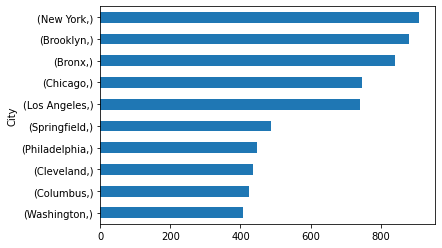

In [253]:
# Top ten cities present in the dataset
univariate_analysis(nhpd, ['City'])

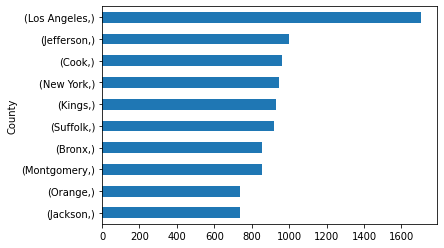

In [254]:
# Top ten counties present in the dataset
univariate_analysis(nhpd, ['County'])

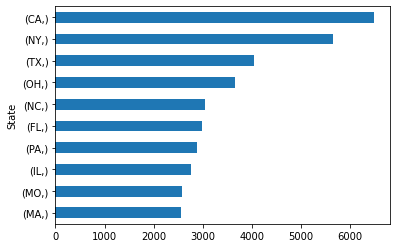

In [255]:
# Top ten states present in the dataset
univariate_analysis(nhpd, ['State'])

#### Let's explore the LIHTC i.e. the 'Low Income Housing Tax Credit' housing subsidies for Florida and compare them with rest of the USA

In [256]:
# Lets explore the the florida data
florida_df = nhpd[nhpd['State'] == 'FL']
florida_df.head()

,NHPDPropertyID,PropertyName,PropertyAddress,City,State,Zip,CBSACode,CBSAType,County,CountyCode,...,NumberActiveMR,NumberInconclusiveMR,NumberInactiveMR,Mr_1_Status,Mr_1_ProgramName,Mr_1_AssistedUnits,Mr_2_Status,Mr_2_ProgramName,Mr_2_AssistedUnits,OldNHPDPropertyID
144,1000147,SUNTERRA APARTMENTS,3541 Evans Ave,Fort Myers,FL,33901-8328,15980.0,Metropolitan Statistical Area,Lee,12071.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,1000163,BUENA VISTA APARTMENTS,521 SW 6th St,Miami,FL,33130-2773,33100.0,Metropolitan Statistical Area,Miami-Dade,12086.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,1000165,VILLA BEATRIZ,776 NW 2nd St,Miami,FL,33128-1454,33100.0,Metropolitan Statistical Area,Miami-Dade,12086.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,1000172,PORTILLO APARTMENTS,3559 Portillo Rd,Spring Hill,FL,34608,45300.0,Metropolitan Statistical Area,Hernando,12053.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,1000611,PHASE IV-B,4231 Machiavelli Ln,Fort Myers,FL,33916-4870,15980.0,Metropolitan Statistical Area,Lee,12071.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [257]:
# Get the rest of US data for comparison with Florida data
rest_US = nhpd[nhpd['State'] != 'FL']
rest_US.head()

,NHPDPropertyID,PropertyName,PropertyAddress,City,State,Zip,CBSACode,CBSAType,County,CountyCode,...,NumberActiveMR,NumberInconclusiveMR,NumberInactiveMR,Mr_1_Status,Mr_1_ProgramName,Mr_1_AssistedUnits,Mr_2_Status,Mr_2_ProgramName,Mr_2_AssistedUnits,OldNHPDPropertyID
0,1000000,IVY ESTATES,6729 Zeigler Blvd,Mobile,AL,36608-4253,33660.0,Metropolitan Statistical Area,Mobile,1097.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000001,RENDU TERRACE WEST,7400 Old Shell Rd,Mobile,AL,36608-4549,33660.0,Metropolitan Statistical Area,Mobile,1097.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000002,TWB RESIDENTIAL OPPORTUNITIES II,93 Canal Rd,Port Jefferson Station,NY,11776-3024,35620.0,Metropolitan,Suffolk,36103.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000003,THE DAISY HOUSE,615 Clarissa St,Rochester,NY,14608-2485,40380.0,Metropolitan,Monroe,36055.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000004,MAIN AVENUE APARTMENTS,105 E Walnut St,Sylacauga,AL,35150-3012,45180.0,Micropolitan Statistical Area,Talladega,1121.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
# Total number of units covered by subsidy for florida and the rest of US

LIHTC_florida = florida_df[['City', 'LIHTC_1_AssistedUnits', 'NumberActiveLihtc', 'NumberInconclusiveLihtc', 
                            'NumberInactiveLihtc', 'LIHTC_2_AssistedUnits']]


LIHTC_florida.dropna(inplace=True)

/Users/farazrahman/mapping-floodwater/env/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<AxesSubplot:ylabel='City'>

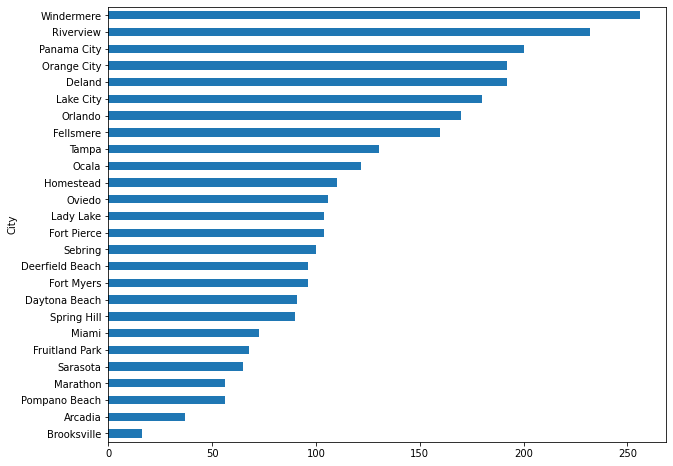

In [259]:
# On an average how many LIHTC units are covered by subsidies in some of the cities in Florida
# Below is the list of cities with LIHTC assisted units for florida 
fig, ax = plt.subplots(figsize=(10,8))
LIHTC_florida.groupby('City')['LIHTC_1_AssistedUnits'].mean().sort_values().plot.barh()

###### For Florida we can see that around 120 LIHTC assisted units are covered with subsidies on an average

In [260]:
LIHTC_florida.groupby('City')['LIHTC_1_AssistedUnits'].mean().describe()

count     26.000000
mean     119.297436
std       61.179588
min       16.000000
25%       77.000000
50%      104.000000
75%      167.500000
max      256.000000
Name: LIHTC_1_AssistedUnits, dtype: float64

###### When comparing with the rest of the US we can see that around 60 LIHTC assisted units are covered with subsidies on an average

In [261]:
# Total number of units covered by subsidy for florida and the rest of US

LIHTC_rest_US = rest_US[['City', 'LIHTC_1_AssistedUnits', 'LIHTC_2_AssistedUnits', 
                         'NumberActiveLihtc', 'NumberInconclusiveLihtc', 
                            'NumberInactiveLihtc']]


LIHTC_rest_US.dropna(inplace=True)

LIHTC_rest_US.groupby('City')['LIHTC_1_AssistedUnits'].mean().describe()

/Users/farazrahman/mapping-floodwater/env/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


count    1023.000000
mean       60.665368
std        47.917444
min         0.000000
25%        29.000000
50%        48.000000
75%        80.000000
max       369.500000
Name: LIHTC_1_AssistedUnits, dtype: float64

###### Number of active LIHTC subsidies in Florida grouped by city- On an average there are just 2-4 active LIHTC subsidies for cities in Florida

<AxesSubplot:ylabel='City'>

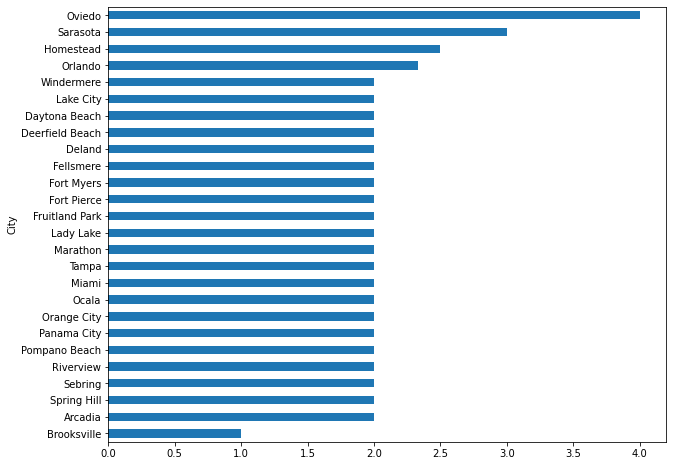

In [262]:
fig, ax = plt.subplots(figsize=(10,8))
LIHTC_florida.groupby('City')['NumberActiveLihtc'].mean().sort_values().plot.barh()

In [263]:
LIHTC_florida.groupby('City')['NumberActiveLihtc'].mean().describe()

count    26.000000
mean      2.108974
std       0.492031
min       1.000000
25%       2.000000
50%       2.000000
75%       2.000000
max       4.000000
Name: NumberActiveLihtc, dtype: float64

###### Number of active LIHTC subsidies for rest of the US grouped by city- On an average there are just 2-5 active LIHTC subsidies for cities all over the USA

In [264]:
LIHTC_rest_US.groupby('City')['NumberActiveLihtc'].mean().describe()

count    1023.000000
mean        2.027531
std         0.425800
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         5.250000
Name: NumberActiveLihtc, dtype: float64